([], <a list of 0 Text yticklabel objects>)

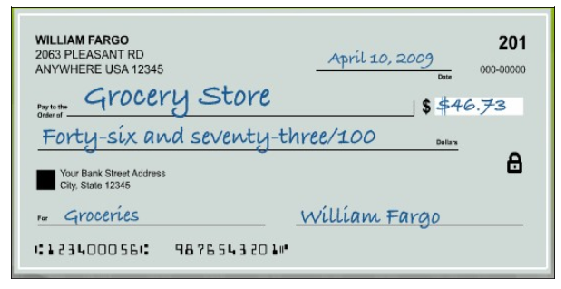

In [460]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize']=[10,5]

maindir=os.getcwd()
desktop=os.path.join(maindir,'Desktop')
c1=os.path.join(desktop,'cheque1.jpg')
c2=os.path.join(desktop,'cheque2.jpg')

img1=cv2.imread(c1)
img1=cv2.resize(img1,(600,300),interpolation=cv2.INTER_LINEAR)
plt.imshow(img1[:,:,::-1])
plt.xticks([])
plt.yticks([])

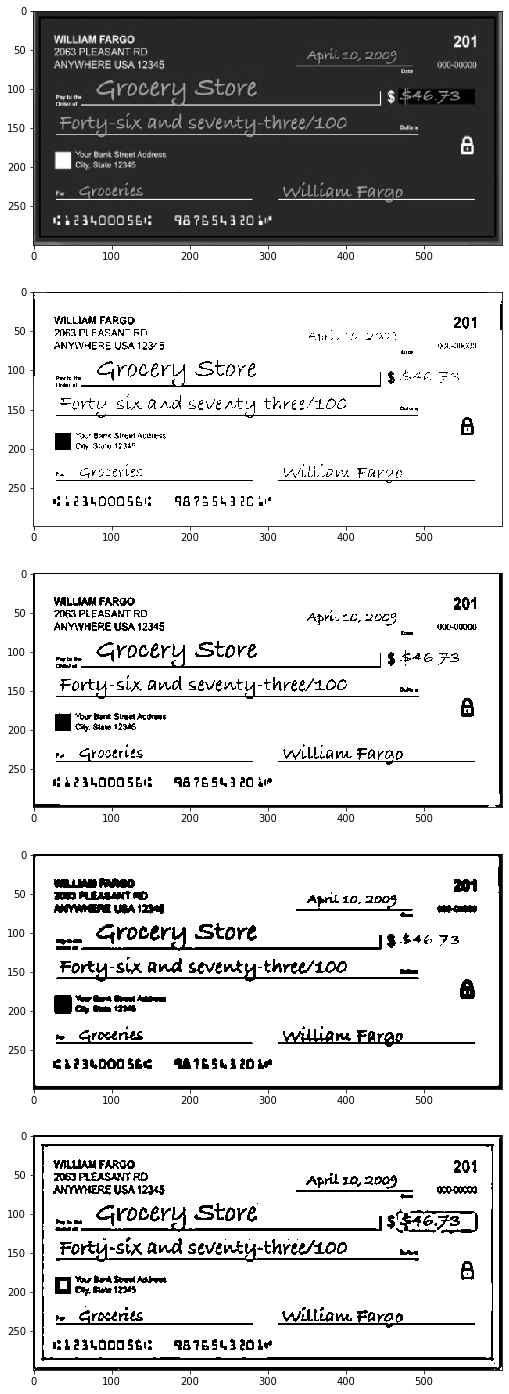

In [461]:
i=cv2.cvtColor(img1[:,:,::-1],cv2.COLOR_BGR2GRAY)
f,(a1,a2,a3,a4,a5)=plt.subplots(5,1,figsize=(10,25))
a1.imshow(i,cmap='binary')
a2.imshow(cv2.threshold(i,127,255,cv2.THRESH_BINARY_INV)[1],'binary')
a3.imshow(cv2.threshold(i,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1],'binary')
blur = cv2.GaussianBlur(i,(5,5),0)
a4.imshow(cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1],'binary')
a5.imshow(cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2),'binary')

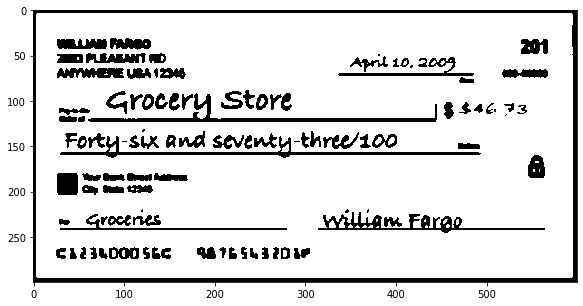

In [500]:
thresh=cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
ada_thresh=cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
plt.imshow(thresh,'binary')

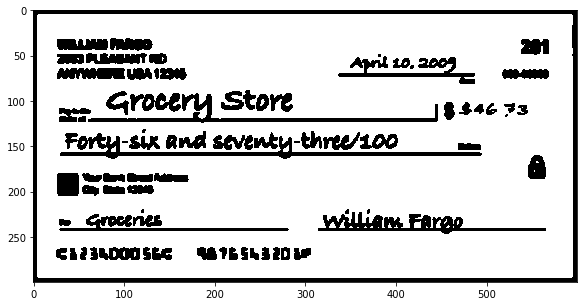

In [502]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
dil=cv2.dilate(thresh,kernel,iterations=1)
plt.imshow(dil,'binary')
dil=thresh

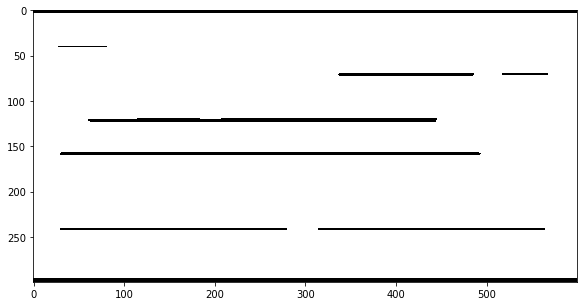

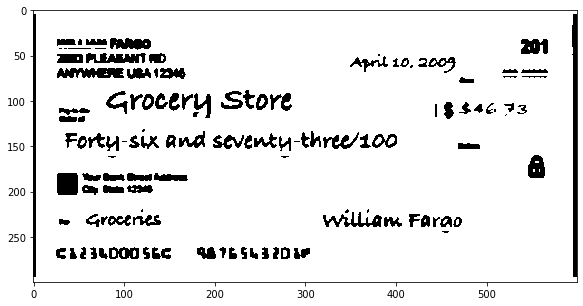

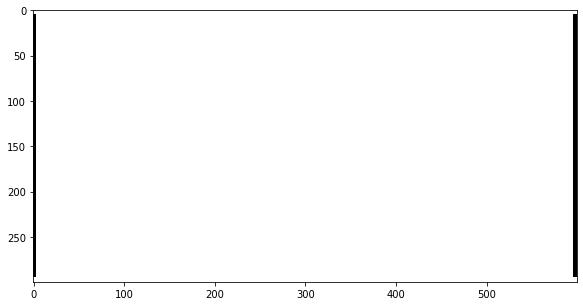

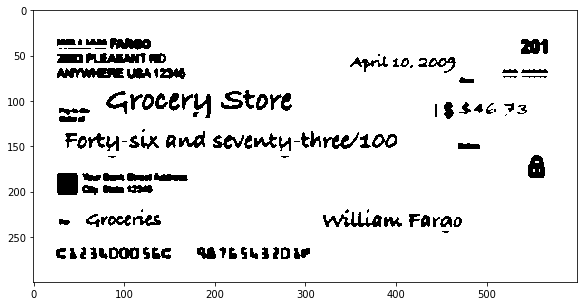

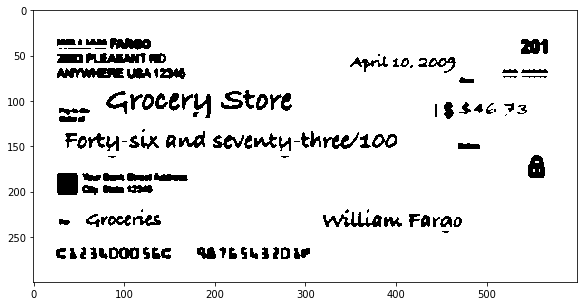

In [504]:
horizontal_kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(25,1))
hor_lines=cv2.morphologyEx(dil.copy(),cv2.MORPH_OPEN,horizontal_kernel,iterations=2)
hor_cnts=cv2.findContours(hor_lines.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
hor_img= cv2.drawContours(dil.copy(), hor_cnts[0], -1, (0,0,0), 2)
plt.figure()
plt.imshow(hor_lines,'binary')
plt.figure()
plt.imshow(hor_img,'binary')
vertical_kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(1,25))
ver_lines=cv2.morphologyEx(hor_img.copy(),cv2.MORPH_OPEN,vertical_kernel,iterations=2)
ver_cnts=cv2.findContours(ver_lines.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
ver_img= cv2.drawContours(hor_img.copy(), ver_cnts[0], -1, (0,0,0), 2)
plt.figure()
plt.imshow(ver_lines,'binary')
plt.figure()
plt.imshow(ver_img,'binary')

lines_removed=ver_img.copy()
plt.figure()
plt.imshow(lines_removed,'binary')

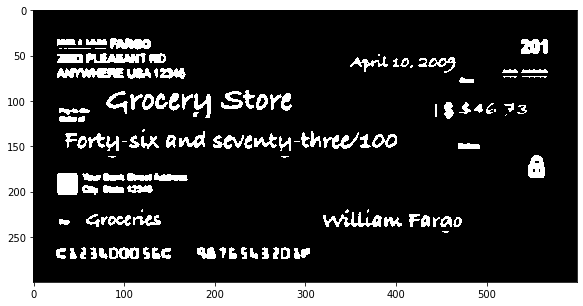

In [505]:
plt.imshow(cv2.threshold(lines_removed,100,255,cv2.THRESH_BINARY_INV)[1],'binary')

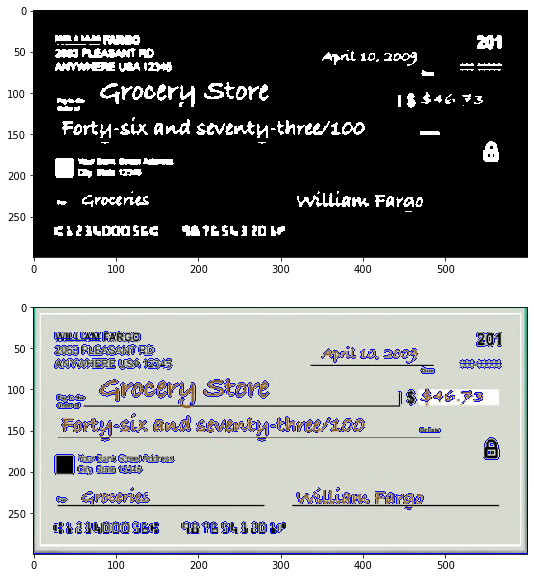

In [506]:
#lines_removed=cv2.GaussianBlur(lines_removed,(5,5),0)
cont_inp=cv2.threshold(lines_removed,100,255,cv2.THRESH_BINARY_INV)[1]

f,(a1,a2)=plt.subplots(2,1,figsize=(9,10))

a1.imshow(cont_inp,'binary')

contours=cv2.findContours(cont_inp.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cont_img = cv2.drawContours(img1.copy(), contours[0], -1, (0,0,255), 1)

a2.imshow(cont_img)

"\nroi_inv=cv2.threshold(roi.copy(),127,255,cv2.THRESH_BINARY_INV)[1]\nroi_inv=cv2.erode(roi_inv,np.ones((2,2)))\nroi_inv=cv2.dilate(roi_inv,np.ones((2,2)))\nroi_inv=cv2.GaussianBlur(roi_inv,(5,5),0)\nplt.figure()\nplt.imshow(roi_inv,'binary')\n"

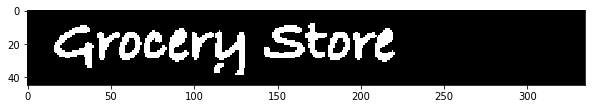

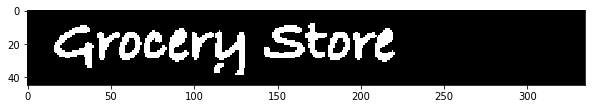

In [598]:
roi=cont_inp[80:125,65:400]
#roi=cv2.resize(roi,(300,50),interpolation=cv2.INTER_AREA)
plt.imshow(roi,'binary')
roi=cv2.threshold(roi.copy(),127,255,cv2.THRESH_BINARY)[1]
plt.figure()
plt.imshow(roi,'binary')
'''
roi_inv=cv2.threshold(roi.copy(),127,255,cv2.THRESH_BINARY_INV)[1]
roi_inv=cv2.erode(roi_inv,np.ones((2,2)))
roi_inv=cv2.dilate(roi_inv,np.ones((2,2)))
roi_inv=cv2.GaussianBlur(roi_inv,(5,5),0)
plt.figure()
plt.imshow(roi_inv,'binary')
'''

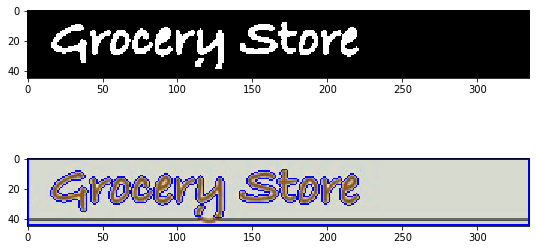

In [599]:
#cont_inp=cv2.threshold(lines_removed,100,255,cv2.THRESH_BINARY_INV)[1]

f,(a1,a2)=plt.subplots(2,1,figsize=(9,5))

a1.imshow(roi,'binary')

contours=cv2.findContours(roi.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cont_img = cv2.drawContours(img1[80:125,65:400,:].copy(), contours[0], -1, (0,0,255), 1)

a2.imshow(cont_img)

In [582]:
roi.shape

(45, 335)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   64  368  972 1689 2311 2676 2677 2471 2311 2231 2168 2087 2009
 1992 2008 1976 1961 2056 2231 2551 3205 3983 4367 4048 2930 1422  416
  480 1581 3056 3903 3744 2979 2153 1594 1291 1100  972  925 1004 1292
 1849 2598 3218 3345 2996 2534 2231 2168 2343 2662 2851 2581 1800  974
  816 1530 2565 3250 3297 2917 2566 2470 2534 2533 2327 1961 1515 1020
  686  974 1959 2995 3537 3697 3745 3729 3650 3554 3346 2804 1880  894
  496 1264 2770 3808 3808 3139 2311 1674 1307 1100  972  925  924  876
 1022 1949 3584 4970 5242 4237 2649 1532 1179 1164 1211 1259 1275 1387
 2059 3620 5399 6310 5832 3980 1696  320    0    0    0    0    0    0
    0   80  416  956 1354 1418 1339 1467 1928 2502 2948 3171 3123 2916
 2822 2900 2948 2901 2901 2980 3044 3076 3139 3171 2915 2263 1499  989
  927 1517 2740 3998 4573 4173 3157 2280 1881 1721 1546 1196  783  880
 1753 2788 3282 3186 2805 2407 2152 2120 2375 2772 2883 2422 1513  672
  624 

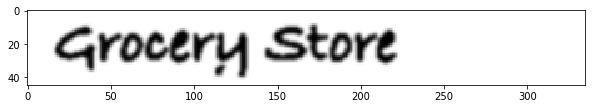

In [600]:
roi_inv=cv2.threshold(roi.copy(),127,255,cv2.THRESH_BINARY_INV)[1]
roi_inv=cv2.erode(roi_inv,np.ones((2,2)))
roi_inv=cv2.dilate(roi_inv,np.ones((2,2)))
roi_inv=cv2.GaussianBlur(roi_inv,(5,5),0)
plt.figure()
plt.imshow(roi_inv,'binary')

vertical_weights=np.sum(roi_inv,0)

#vertical_weights[vertical_weights<800]=0

print(vertical_weights)

In [596]:
pixel_start,pixel_end=[],[]

def getEnd(arr,ind) :
    while ind<len(arr) and arr[ind]!=0 :
        ind+=1
    return ind-1

i=0
while i<roi.shape[1] :
    flag=0
    if vertical_weights[i] > 0 :
        pixel_start.append(i)
        pixel_end.append(getEnd(vertical_weights,i))
        flag=1
    if flag==0 :
        i+=1
    else :
        i=pixel_end[-1]+1  

character_boundaries=list(zip(pixel_start,pixel_end))

print(character_boundaries)

[(15, 133), (141, 223)]


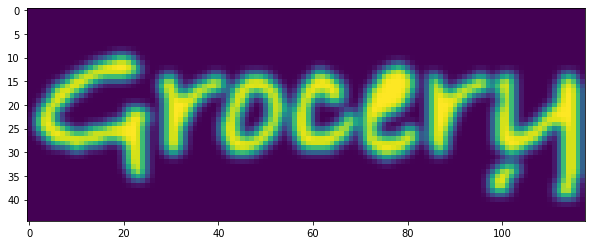

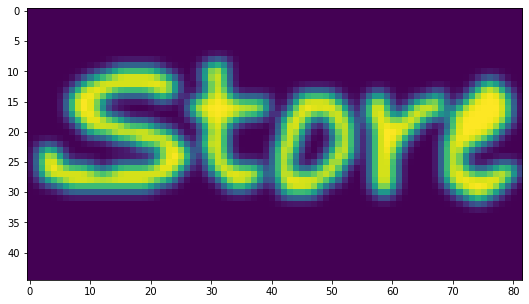

In [597]:
for tup in character_boundaries :
    plt.figure()
    plt.imshow(roi_inv[:,tup[0]:tup[1]])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 1020 1785 2295 3060 2805 2295 2295 2295 2040 2295 1785
 2040 2040 2040 1785 2040 2295 2295 2805 4590 4590 4335 3825  510    0
    0  765 4080 4335 4080 3315 1785 1530 1275 1020 1020  765 1020 1020
 1785 2550 3570 3825 3060 2550 2295 2040 2295 2550 3315 2805 2040  510
    0 1530 2805 3570 3825 2805 2550 2550 2550 2805 2295 2040 1530 1020
  510  510 2295 3315 3825 3825 3825 3825 3570 3570 3570 3060 2040  510
    0    0 3825 4335 4080 3315 2295 1530 1275 1020 1020  765 1020 1020
  510 1275 4080 5610 5865 5100 2040 1020 1275 1020 1275 1275 1275 1275
 1275 3315 6630 6630 6630 5100    0    0    0    0    0    0    0    0
    0    0    0 1275 1530 1530 1275 1275 2040 2550 3060 3315 3315 3060
 2550 3060 3060 2805 2805 3060 3060 3060 3315 3315 3315 2295 1275  765
  765 1020 3060 4590 4845 5100 2805 2040 1785 1785 1530 1530  510    0
 1785 3315 3570 3570 2805 2295 2040 2040 2295 3060 3315 2550 1785    0
    0 

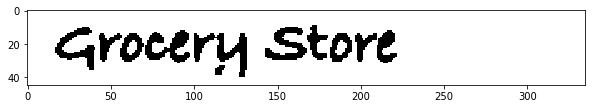

In [603]:
roi_inv=cv2.threshold(roi.copy(),127,255,cv2.THRESH_BINARY_INV)[1]
roi_inv=cv2.erode(roi_inv,np.ones((2,2)))
roi_inv=cv2.dilate(roi_inv,np.ones((2,2)))
roi_inv=cv2.GaussianBlur(roi_inv,(3,3),0)
roi_inv=cv2.threshold(roi_inv,100,255,cv2.THRESH_BINARY)[1]
plt.figure()
plt.imshow(roi_inv,'binary')

vertical_weights=np.sum(roi_inv,0)

#vertical_weights[vertical_weights<800]=0

print(vertical_weights)

In [604]:
pixel_start,pixel_end=[],[]

def getEnd(arr,ind) :
    while ind<len(arr) and arr[ind]!=0 :
        ind+=1
    return ind-1

i=0
while i<roi.shape[1] :
    flag=0
    if vertical_weights[i] > 0 :
        pixel_start.append(i)
        pixel_end.append(getEnd(vertical_weights,i))
        flag=1
    if flag==0 :
        i+=1
    else :
        i=pixel_end[-1]+1  

character_boundaries=list(zip(pixel_start,pixel_end))

print(character_boundaries)

[(17, 40), (43, 69), (71, 97), (100, 131), (143, 180), (182, 194), (197, 221)]


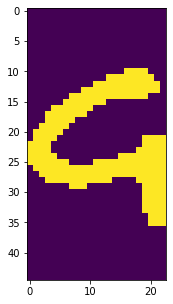

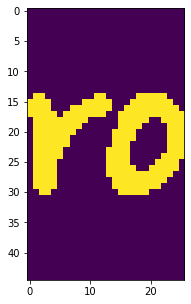

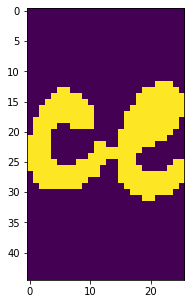

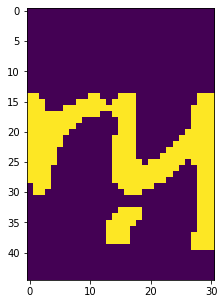

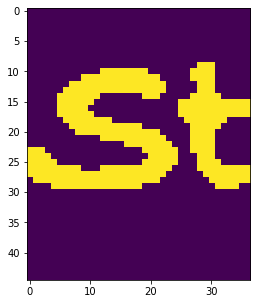

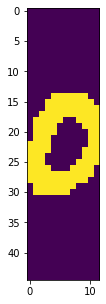

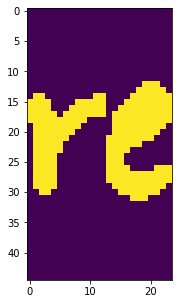

In [605]:
for tup in character_boundaries :
    plt.figure()
    plt.imshow(roi_inv[:,tup[0]:tup[1]])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 1785 2295 3060 2805 2295 2295 2295 2040 2295 1785
 2040 2040 2040 1785 2040 2295 2295 2805 4590 4335 4080 3570    0    0
    0    0 4080 4335 4080 3315 1785 1530 1275    0    0    0    0    0
 1785 2550 3570 3825 3060 2550 2295 2040 2295 2550 3315 2805 2040    0
    0 1785 2805 3570 3825 2805 2550 2550 2550 2805 2295 2040 1275    0
    0    0 2295 3315 3825 3825 3825 3825 3570 3570 3570 3060 2040    0
    0    0 3570 4080 4080 3570 2295 1530 1275    0    0    0    0    0
    0 1275 4080 5610 5610 5100 1785    0 1275    0 1275 1275 1275 1275
 1275 3315 6375 6630 6120 5100    0    0    0    0    0    0    0    0
    0    0    0    0 1530 1530 1275 1275 2040 2550 3060 3315 3315 3060
 2550 3060 3060 2805 2805 3060 3060 3060 3315 3315 3315 2295 1275    0
    0    0 3060 4590 4845 4845 2805 2040 1785 1785 1530    0    0    0
 1785 3060 3570 3570 2805 2295 2040 2040 2295 3060 3315 2550 1785    0
    0 

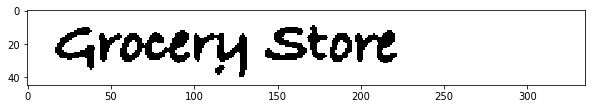

In [643]:
roi_inv=cv2.threshold(roi.copy(),127,255,cv2.THRESH_BINARY_INV)[1]
roi_inv=cv2.dilate(roi_inv,np.ones((2,2)))
roi_inv=cv2.erode(roi_inv,np.ones((2,2)))
roi_inv=cv2.GaussianBlur(roi_inv,(5,5),0)
roi_inv=cv2.threshold(roi_inv,127,255,cv2.THRESH_BINARY)[1]
plt.figure()
plt.imshow(roi_inv,'binary')

vertical_weights=np.sum(roi_inv,0)

vertical_weights[vertical_weights<1100]=0

print(vertical_weights)

pixel_start,pixel_end=[],[]

def getEnd(arr,ind) :
    while ind<len(arr) and arr[ind]!=0 :
        ind+=1
    return ind-1

i=0
while i<roi.shape[1] :
    flag=0
    if vertical_weights[i] > 0 :
        pixel_start.append(i)
        pixel_end.append(getEnd(vertical_weights,i))
        flag=1
    if flag==0 :
        i+=1
    else :
        i=pixel_end[-1]+1  

character_boundaries=list(zip(pixel_start,pixel_end))

print('\nCharacter Locations : ')
print(character_boundaries)

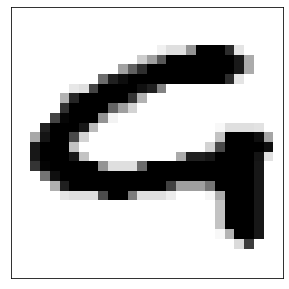

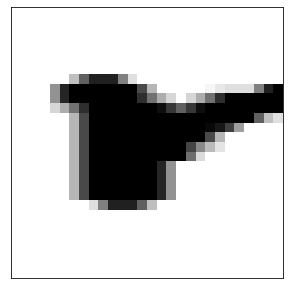

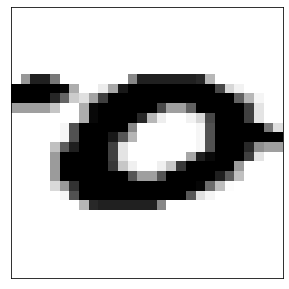

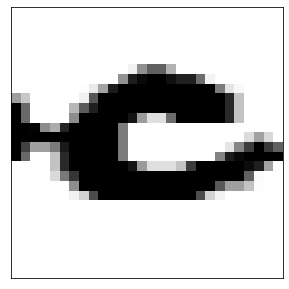

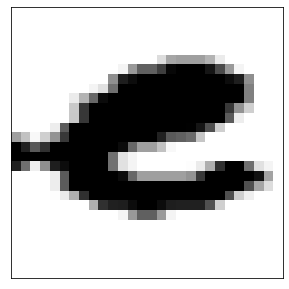

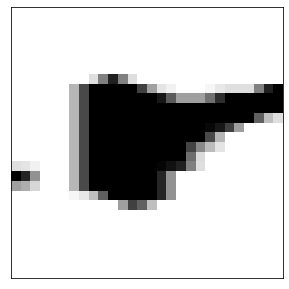

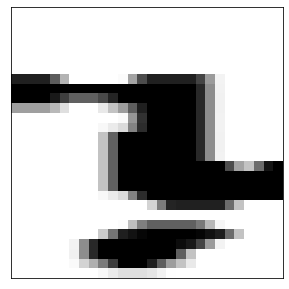

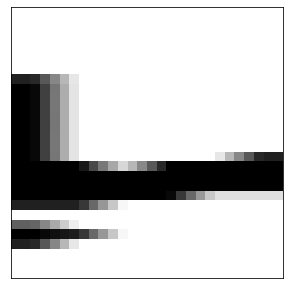

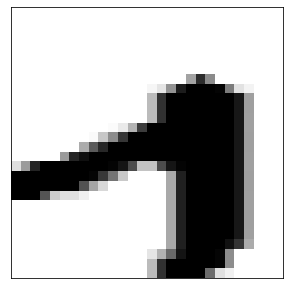

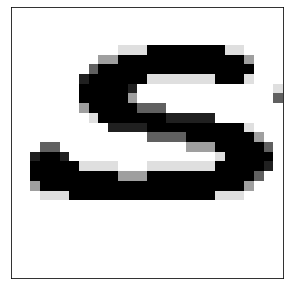

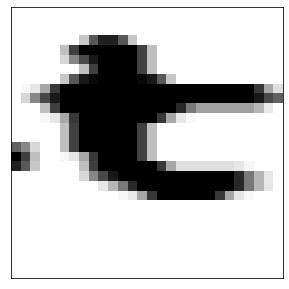

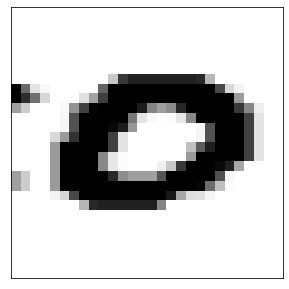

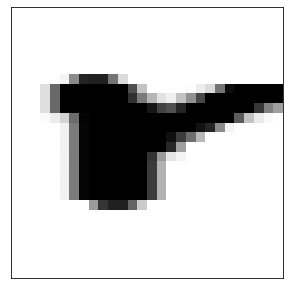

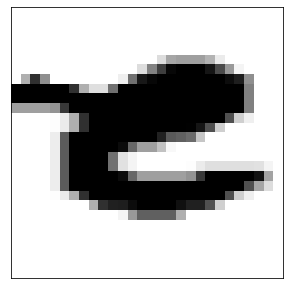

In [651]:
char_imgs=[]
for tup in character_boundaries :
    pres_img=roi_inv[5:40,tup[0]-3:tup[1]+3]
    char_imgs.append(pres_img)

char_imgs=list(map(lambda x : cv2.resize(x,(28,28),0,interpolation=cv2.INTER_LINEAR),char_imgs))

for each in char_imgs :
    plt.figure()
    plt.imshow(each,'binary')
    plt.xticks([])
    plt.yticks([])

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib as mpl
import seaborn as sns
#mpl.rcParams['figure.figsize']=[10,5]

maindir=os.getcwd()
desktop=os.path.join(maindir,'Desktop')
c1=os.path.join(desktop,'cheque1.jpg')
c2=os.path.join(desktop,'cheque2.jpg')

img1=cv2.imread(c1)
img1=cv2.resize(img1,(600,300),interpolation=cv2.INTER_LINEAR)
plt.imshow(img1[:,:,::-1])
plt.xticks([])
plt.yticks([])

i=cv2.cvtColor(img1[:,:,::-1],cv2.COLOR_BGR2GRAY)

thresh=cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
#ada_thresh=cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
plt.figure()
plt.imshow(thresh,'binary')

kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
dil=cv2.dilate(thresh,kernel,iterations=1)
plt.figure()
plt.imshow(dil,'binary')

horizontal_kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(25,1))
hor_lines=cv2.morphologyEx(dil.copy(),cv2.MORPH_OPEN,horizontal_kernel,iterations=2)
hor_cnts=cv2.findContours(hor_lines.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
hor_img= cv2.drawContours(dil.copy(), hor_cnts[0], -1, (0,0,0), 2)
plt.figure()
plt.imshow(hor_lines,'binary')
plt.figure()
plt.imshow(hor_img,'binary')
vertical_kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(1,25))
ver_lines=cv2.morphologyEx(hor_img.copy(),cv2.MORPH_OPEN,vertical_kernel,iterations=2)
ver_cnts=cv2.findContours(ver_lines.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
ver_img= cv2.drawContours(hor_img.copy(), ver_cnts[0], -1, (0,0,0), 2)
plt.figure()
plt.imshow(ver_lines,'binary')
plt.figure()
plt.imshow(ver_img,'binary')

lines_removed=ver_img.copy()
plt.figure()
plt.imshow(lines_removed,'binary')

roi=cont_inp[80:125,65:400]
#roi=cv2.resize(roi,(300,50),interpolation=cv2.INTER_AREA)
plt.imshow(roi,'binary')
roi=cv2.threshold(roi.copy(),127,255,cv2.THRESH_BINARY)[1]
plt.figure()
plt.imshow(roi,'binary')

roi_inv=cv2.threshold(roi.copy(),127,255,cv2.THRESH_BINARY_INV)[1]
roi_inv=cv2.dilate(roi_inv,np.ones((2,2)))
roi_inv=cv2.erode(roi_inv,np.ones((2,2)))
roi_inv=cv2.GaussianBlur(roi_inv,(5,5),0)
roi_inv=cv2.threshold(roi_inv,127,255,cv2.THRESH_BINARY)[1]
plt.figure()
plt.imshow(roi_inv,'binary')

vertical_weights=np.sum(roi_inv,0)

vertical_weights[vertical_weights<1100]=0

print(vertical_weights)

pixel_start,pixel_end=[],[]

def getEnd(arr,ind) :
    while ind<len(arr) and arr[ind]!=0 :
        ind+=1
    return ind-1

i=0
while i<roi.shape[1] :
    flag=0
    if vertical_weights[i] > 0 :
        pixel_start.append(i)
        pixel_end.append(getEnd(vertical_weights,i))
        flag=1
    if flag==0 :
        i+=1
    else :
        i=pixel_end[-1]+1  

character_boundaries=list(zip(pixel_start,pixel_end))

print('\nCharacter Locations : ')
print(character_boundaries)

char_imgs=[]
for tup in character_boundaries :
    pres_img=roi_inv[5:40,tup[0]-3:tup[1]+3]
    char_imgs.append(pres_img)

char_imgs=list(map(lambda x : cv2.resize(x,(28,28),0,interpolation=cv2.INTER_AREA),char_imgs))

for each in char_imgs :
    plt.figure()
    plt.imshow(each,'binary')
    plt.xticks([])
    plt.yticks([])